# Pytorch Tutoral - RNN

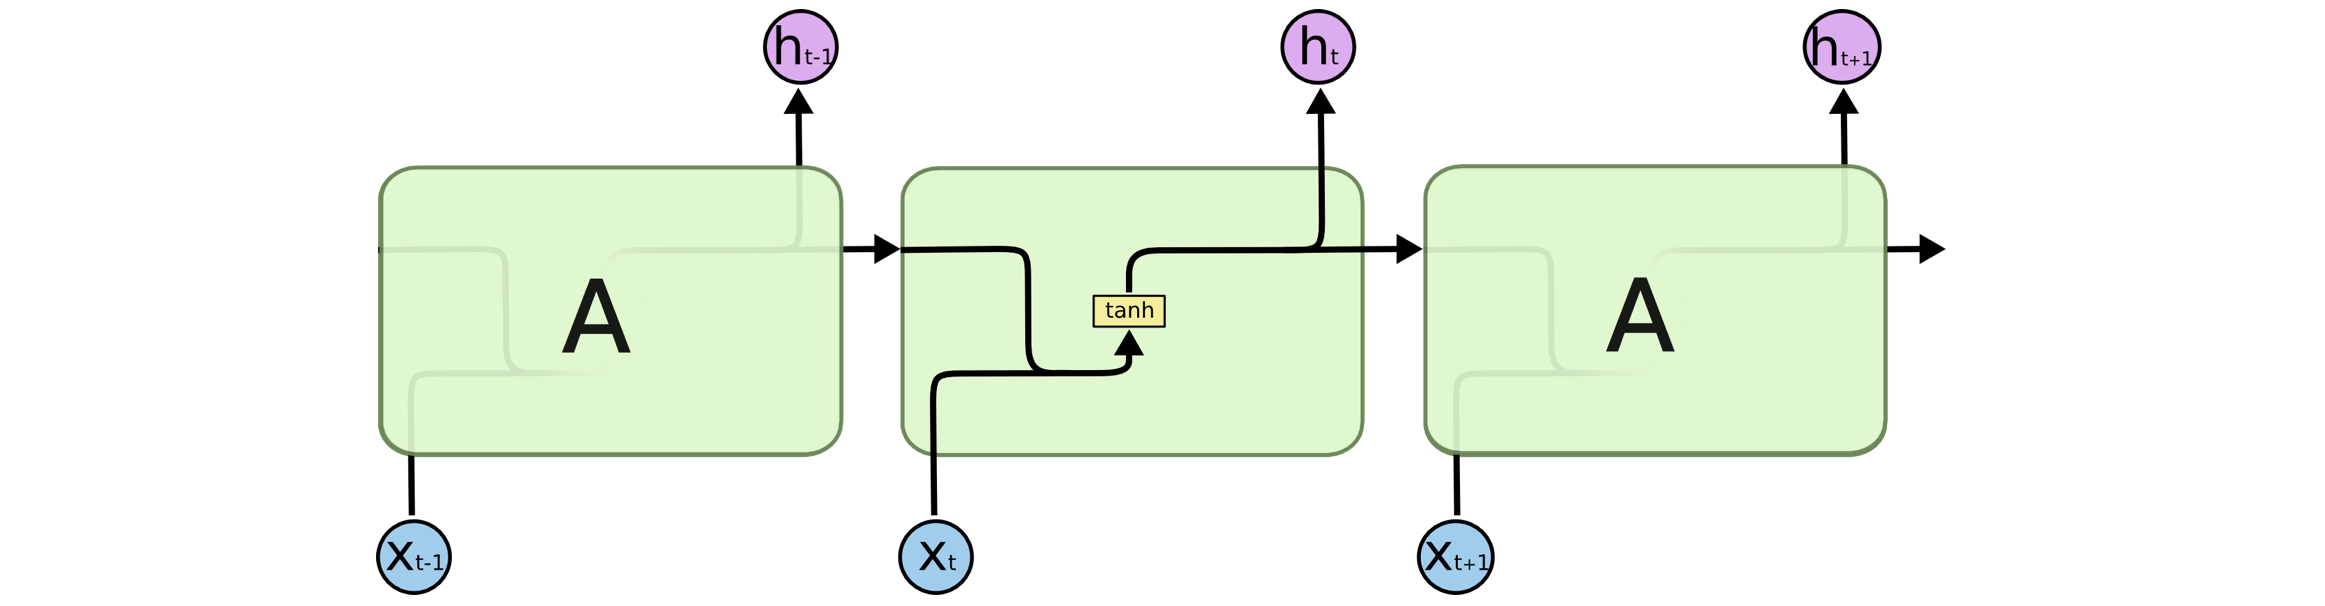

In [14]:
from IPython.display import Image
Image('rnn1.png')

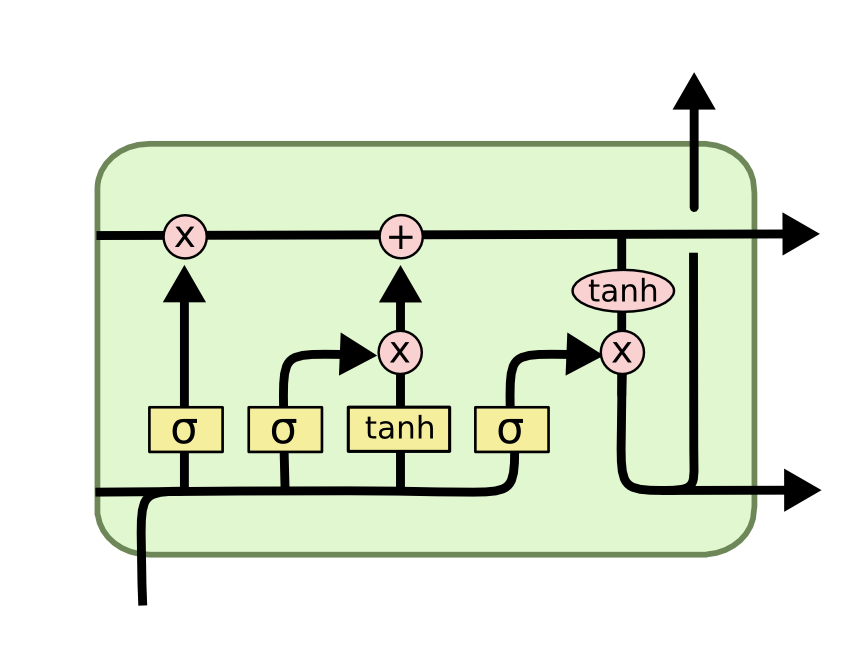

In [ ]:
from IPython.display import Image
Image('lstm1.png')

In [15]:
import torch
import torch.nn as nn

print(torch.__version__)

1.7.0+cu101


In [36]:
# RNN 예시
rnn = nn.RNN(3, 3)  # Input dim is 3, output dim is 3
inputs = [torch.randn(1, 3) for _ in range(5)]  # sequence의 크기가 5
print('inputs : ', inputs)
# initialize the hidden state.
hidden = (torch.randn(1, 1, 3))
for i in inputs:
    # 한 스텝에서 하나의 sequence를 입력으로 
    # 각 스텝이 끝날 때마다 hidden 값은 연결됨
    out, hidden = rnn(i.view(1, 1, -1), hidden)
print('out: ', out)
print('out shape: ', out.shape)
print('hidden: ', hidden)
print('hidden shape: ', hidden.shape)

inputs :  [tensor([[ 0.1375,  1.5049, -1.2597]]), tensor([[ 0.5901, -2.5640,  0.7672]]), tensor([[ 0.4766, -1.1615, -0.0617]]), tensor([[ 1.3723, -1.0715, -1.2721]]), tensor([[ 0.1172, -2.4750, -1.2411]])]
out:  tensor([[[ 0.8476, -0.2891,  0.9473]]], grad_fn=<StackBackward>)
out shape:  torch.Size([1, 1, 3])
hidden:  tensor([[[ 0.8476, -0.2891,  0.9473]]], grad_fn=<StackBackward>)
hidden shape:  torch.Size([1, 1, 3])


In [9]:
# LSTM 예시
lstm = nn.LSTM(3, 3)  # Input dim is 3, output dim is 3
inputs = [torch.randn(1, 3) for _ in range(5)]  # sequence의 크기가 5
print('inputs : ', inputs)
# initialize the hidden state.
hidden = (torch.randn(1, 1, 3),
          torch.randn(1, 1, 3))
for i in inputs:
    # 한 스텝에서 하나의 sequence를 입력으로 
    # 각 스텝이 끝날 때마다 hidden 값은 연결됨
    out, hidden = lstm(i.view(1, 1, -1), hidden)
print('out: ', out)
print('out shape: ', out.shape)
print('hidden: ', hidden)
print('hidden state shape: ', hidden[0].shape)
print('cell state shape: ', hidden[1].shape)

inputs :  [tensor([[0.1083, 0.6724, 0.3088]]), tensor([[-1.9268, -0.9541,  0.2925]]), tensor([[-1.0944,  0.4967, -1.1188]]), tensor([[ 1.9047,  0.7680, -0.6291]]), tensor([[-0.9119,  0.0491, -1.0373]])]
out:  tensor([[[-0.0692,  0.1055,  0.1168]]], grad_fn=<StackBackward>)
out shape:  torch.Size([1, 1, 3])
hidden:  (tensor([[[-0.0692,  0.1055,  0.1168]]], grad_fn=<StackBackward>), tensor([[[-0.1493,  0.2938,  0.2025]]], grad_fn=<StackBackward>))
hidden state shape:  torch.Size([1, 1, 3])
cell state shape:  torch.Size([1, 1, 3])


# RNN
- 문자-단위 RNN으로 이름 분류하기입니다.
- 문자-단위 RNN은 단어를 문자의 연속으로 읽어 들여서 각 단계의 예측과 '은닉 상태'를 출력하고 다음 단계에 이전의 은닉 상태를 전달합니다.
- 단어가 속한 클래스로 출력이 되도록 최종 예측을 선택합니다.
(총 18개 언어로 된 수천 개의 성을 훈련시키고 철자에 따라 이름이 어떤 언어인지 예측)
- 아래의 링크에서 데이터를 다운받을 수 있습니다. 데이터를 다운받고 data디렉토리를 생성후 다운 받은 파일을 넣으면 됩니다.  \
https://download.pytorch.org/tutorial/data.zip



---



---



## 데이터 준비
- 각 파일에는 한 줄에 하나의 이름이 포함되어 있으며 대부분 로마자로 되어있기 때문에 ASCII로 변환해야 합니다.함
- 각 언어별로 이름 목록 사전을 `{language: [names ...]}` 의 형태로 만들어 줍니다.

In [1]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('data/*.txt'))

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# 유니코드 문자열을 ASCII로 변환, https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# 각 언어의 이름 목록인 category_lines 사전 생성
category_lines = {}
all_categories = []

# 파일을 읽고 줄 단위로 분리
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('data/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)
print(n_categories)

['data/Dutch.txt', 'data/Scottish.txt', 'data/Chinese.txt', 'data/Russian.txt', 'data/Irish.txt', 'data/Vietnamese.txt', 'data/French.txt', 'data/Greek.txt', 'data/Spanish.txt', 'data/English.txt', 'data/Arabic.txt', 'data/Italian.txt', 'data/Czech.txt', 'data/Japanese.txt', 'data/German.txt', 'data/Portuguese.txt', 'data/Korean.txt', 'data/Polish.txt']
Slusarski
18


In [2]:
# 각 category를 line에 매핑하는 사전인 category_lines를 생성
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


## 이름을 Tensor로 변경
- 하나의 문자를 표현하기 위해서 크기가 `<1 x n_letters>`인 '원-핫 벡터'를 사용합니다.
- 원핫 벡터는 현재 문자의 주소에만 1값을 가지고 그외에 나머지는 0으로 채워줍니다. 
- 단어를 만들기 위해서 원핫 벡터를 2차원 행렬 `<line_length x 1 x n_letters>`에 결합시킵니다

In [3]:
import torch

# all_letters 로 문자의 주소 찾기, 예시 "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# 검증을 위해서 한개의 문자를 <1 x n_letters> Tensor로 변환
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# 한 줄(이름)을  <line_length x 1 x n_letters>,
# 또는 One-Hot 문자 벡터의 Array로 변경
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


## 네트워크 생성

In [4]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [5]:
input = letterToTensor('A')
hidden =torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)
print(output.shape)
print(next_hidden.shape)

torch.Size([1, 18])
torch.Size([1, 128])


In [6]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)
print(output.shape)
print(next_hidden.shape)

tensor([[-2.8781, -2.8419, -2.9373, -2.8720, -2.9580, -2.8150, -2.8841, -2.8297,
         -2.9059, -2.8908, -2.9353, -2.9478, -2.8970, -2.9503, -2.8641, -2.8977,
         -2.9076, -2.8306]], grad_fn=<LogSoftmaxBackward>)
torch.Size([1, 18])
torch.Size([1, 128])


## 학습

### 학습 준비

In [7]:
# 네트워크 출력으로 가장 확률 이 높은 카테고리 이름(언어)와 카테고리 번호 반환
def categoryFromOutput(output):
    top_n, top_i = output.topk(1) # 텐서의 가장 큰 값 및 주소
    category_i = top_i[0].item()     # 텐서에서 정수 값으로 변경
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Vietnamese', 5)


In [8]:
# 학습 예시를 가져오는 함수
# 하나의 이름과 이름의 언어를 가져옴
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = German / line = Scheer
category = Spanish / line = Bosque
category = Japanese / line = Mushashibo
category = Scottish / line = Docherty
category = Russian / line = Nezavitin
category = Czech / line = Macha
category = Japanese / line = Katayanagi
category = Korean / line = Wang
category = Spanish / line = Ventura
category = Arabic / line = Ganem


### 네트워크 학습
- RNN의 마지막 층이 `nn.LogSoftmax`이므로 `nn.NLLLoss`를 사용
(`nn.CrossEntropyLoss = nn.LogSoftmax + nn.NLLLoss`)
- 학습 루프


> 1. 입력과 정답 Tensor 생성
> 2. 0으로 초기화된 은닉 상태 생성
> 3. 각 문자를 읽기 & 다음 문자를 위한 은닉 상태 유지
> 4. 목표와 최종 출력 비교
> 5. 역전파
> 6. 출력과 손실 반환



In [9]:
criterion = nn.NLLLoss().cuda()
learning_rate = 0.005 # 이것을 너무 높게 설정하면 발산할 수 있고, 너무 낮으면 학습이 되지 않을 수 있습니다.

rnn = RNN(n_letters, n_hidden, n_categories)
rnn = rnn.cuda()

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden().cuda()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i].cuda(), hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # 매개변수의 경사도에 학습률을 곱해서 그 매개변수의 값에 더합니다.
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [10]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000



# 도식화를 위한 손실 추적
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor.cuda(), line_tensor)
    current_loss += loss

    # iter 숫자, 손실, 이름, 추측 화면 출력
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # 현재 평균 손실을 전체 손실 리스트에 추가
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 12s) 2.1625 Trinh / Chinese ✗ (Vietnamese)
10000 10% (0m 24s) 1.8256 Giang / Vietnamese ✓
15000 15% (0m 37s) 1.5884 Henriques / Portuguese ✓
20000 20% (0m 50s) 1.1255 Shadid / Arabic ✓
25000 25% (1m 3s) 2.0364 Widdows / Greek ✗ (English)
30000 30% (1m 15s) 0.2468 Wilson / Scottish ✓
35000 35% (1m 28s) 1.7708 Reynder / German ✗ (Dutch)
40000 40% (1m 40s) 0.6648 Vourlis / Greek ✓
45000 45% (1m 53s) 1.4500 Berg / German ✗ (Dutch)
50000 50% (2m 6s) 1.1519 Ouchi / Japanese ✓
55000 55% (2m 19s) 1.7210 Rios / Greek ✗ (Portuguese)
60000 60% (2m 31s) 4.9509 Budny / Scottish ✗ (Polish)
65000 65% (2m 44s) 0.0470 Papadopulos / Greek ✓
70000 70% (2m 57s) 1.0800 Jamussa / Czech ✗ (Greek)
75000 75% (3m 9s) 0.6377 Madaidhin / Irish ✓
80000 80% (3m 22s) 1.2545 Linton / English ✓
85000 85% (3m 35s) 1.6139 White / Japanese ✗ (Scottish)
90000 90% (3m 48s) 1.2131 Taylor / Scottish ✓
95000 95% (4m 1s) 0.1556 Lombardi / Italian ✓
100000 100% (4m 13s) 3.5007 Soucy / Scottish ✗ (French)


### 결과 도식화
- `all_losses`를 이용해서 네트워크의 학습 과정을 도식화합니다

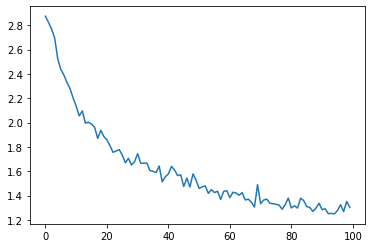

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

## 결과 평가
- 네트워크가 다른 카테고리에서 얼마나 잘 작동하는지 보기위해서 모든 실제 언어가 네트워크에서 어떤 언어로 추출되는지를 나타내는 혼란 행렬(confusion matrix)를 만듭니다.
- 주축에서 벗어난 밝은 점을 선택하여 잘못 추축한 언어를 표시할 수 있습니다.

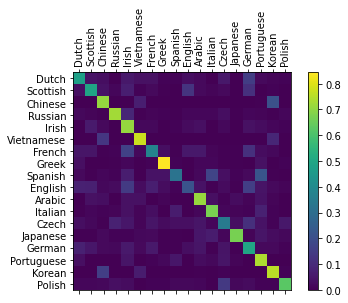

In [12]:
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# 주어진 라인의 출력 반환
def evaluate(line_tensor):
    hidden = rnn.initHidden().cuda()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i].cuda(), hidden)

    return output

# 예시들 중에 어떤 것이 정확하게 예측되었는지 기록
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# 모든 행을 합계로 나누어 정규화
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# 도식 설정
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# 축 설정
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# 모든 tick에서 레이블 지정
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

## 사용자로부터 입력

In [13]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-0.65) Russian
(-1.14) Czech
(-2.88) English

> Jackson
(-0.49) Scottish
(-1.53) English
(-2.50) Russian

> Satoshi
(-0.76) Arabic
(-1.55) Japanese
(-1.98) Italian
